## Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights

**Objective**: Explore the product listing dynamics on Amazon UK to extract actionable business insights. By understanding the distribution, central tendencies, and relationships of various product attributes, businesses can make more informed decisions on product positioning, pricing strategies, and inventory management.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

**Submission**: Submit a Jupyter Notebook which contains code and a business-centric report summarizing your findings. 


### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

---

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
data_AM_UK=pd.read_csv("../amz_uk_price_prediction_dataset.csv")

In [4]:
data_AM_UK.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [5]:
data_AM_UK.shape

(2443651, 9)

In [6]:
data_AM_UK.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [7]:
data_AM_UK.columns

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [8]:
freq_table_cat=data_AM_UK['category'].value_counts()
print('The top 5 categories are:')
print(freq_table_cat.head(5))

The top 5 categories are:
category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64


<Axes: ylabel='category'>

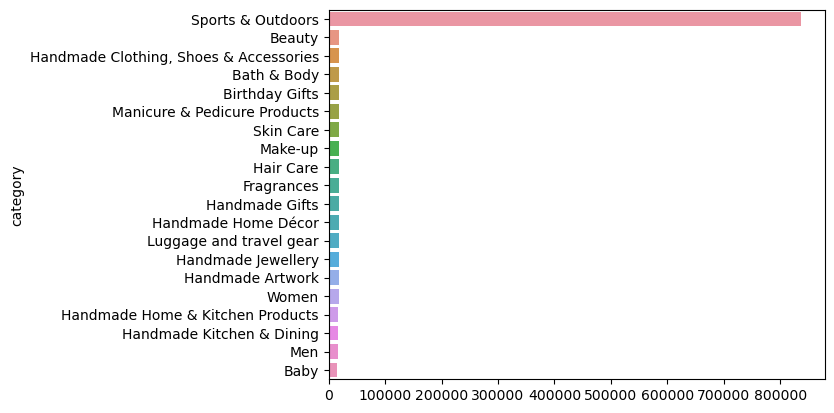

In [9]:
#barplot for the 30 most represented categories
top_20_categories = freq_table_cat.head(20)
sns.barplot(y=top_20_categories.index, x=top_20_categories.values)

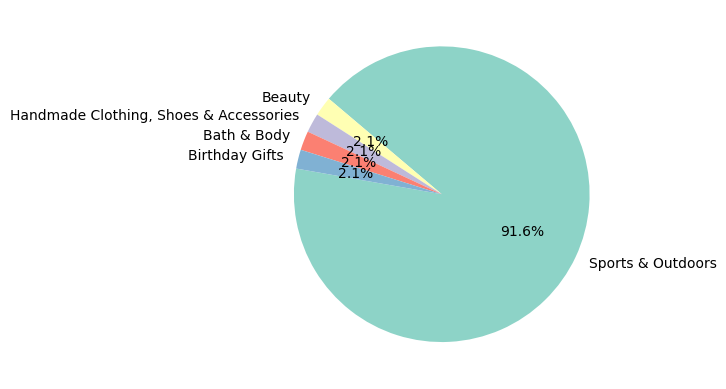

In [10]:
#Keeping only the top 5 categories for visibility in the piechart
top_5_categories = freq_table_cat.head(5)
plt.pie(top_5_categories.values, labels=top_5_categories.index, autopct='%1.1f%%', colors=sns.color_palette("Set3"), startangle=170)
plt.show()

### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 


In [11]:
#calcul stat prices
mean_price = data_AM_UK['price'].mean()
median_price = data_AM_UK['price'].median()
mode_price = data_AM_UK['price'].mode()[0]


print('Mean price is:',mean_price)
print('Median price is:',median_price)
print('Modal price is :',mode_price)


Mean price is: 89.24380943923663
Median price is: 19.09
Modal price is : 9.99


In [12]:
#calcul measures of dispersion.
var_price = data_AM_UK['price'].var()
std_price = data_AM_UK['price'].std()
range_price = data_AM_UK['price'].max()-data_AM_UK['price'].min()
quantiles_price = data_AM_UK['price'].quantile([0.25,0.5, 0.75])

print('The variance of price is:',var_price)
print('The standard deviation of price is:',std_price)
print('The range of price is:',range_price)
print('The quantiles of price are:')
print(quantiles_price)


The variance of price is: 119445.48532256528
The standard deviation of price is: 345.60886175352226
The range of price is: 100000.0
The quantiles of price are:
0.25     9.99
0.50    19.09
0.75    45.99
Name: price, dtype: float64


In [13]:
quantiles_price_sup = data_AM_UK['price'].quantile([0.2, 0.4, 0.6, 0.8])

# Display the quantiles
print("Quantiles of the 'price' column:\n", quantiles_price_sup)

Quantiles of the 'price' column:
 0.2     8.99
0.4    14.99
0.6    25.49
0.8    60.49
Name: price, dtype: float64


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


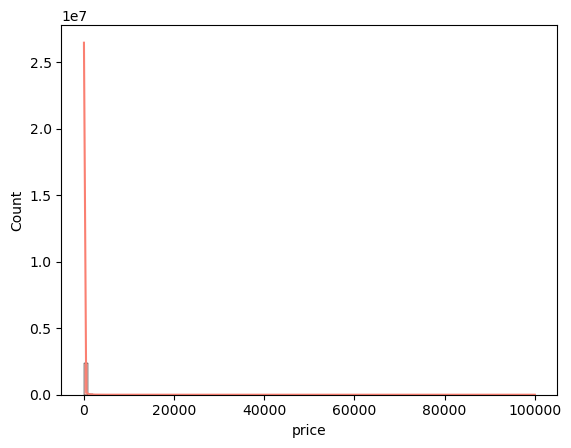

In [14]:
#histogram of the price with bon=100 
sns.histplot(data_AM_UK['price'], kde=True, bins=100, color="salmon");

In [19]:
#Refining the plot making categorize of prices until 200
bins = list(range(0, 201, 10)) + [float('inf')]  # Intervals from 0 to 200 and an extra bin for high prices
labels = [f'{i}-{i+5}' for i in range(0, 200, 10)] + ['high price']
data_AM_UK['price_category'] = pd.cut(data_AM_UK['price'], bins=bins, labels=labels, right=False)


C:\Users\tania\AppData\Local\Temp\ipykernel_29848\1925434472.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data_AM_UK['price_category'], discrete=True, shrink=.8, palette="bright")
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


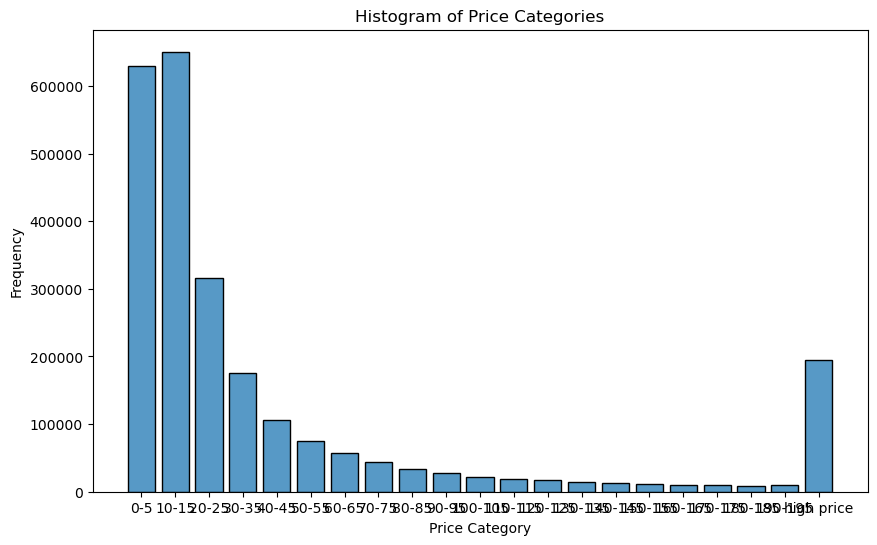

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data_AM_UK['price_category'], discrete=True, shrink=.8, palette="bright")
plt.title('Histogram of Price Categories')
plt.xlabel('Price Category')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Step 1: Calculate the quartiles for the price column
#data_AM_UK['price_quartile'] = pd.qcut(data_AM_UK['price'], 4, labels=["Q1", "Q2", "Q3", "Q4"])

# Step 2: Plot histogram with KDE based on these quartile categories
#sns.histplot(data=data_AM_UK, x='price', hue='price_quartile')

In [ ]:
#alternative to save memory
# Handle Inf values
#data_AM_UK.replace([np.inf, -np.inf], np.nan, inplace=True)

# Explicitly set pandas option
#pd.options.mode.use_inf_as_na = True

# Step 1: Calculate the quartiles for the price column
#data_AM_UK['price_quartile'] = pd.qcut(data_AM_UK['price'], 4, labels=["Q1", "Q2", "Q3", "Q4"])

# Step 2: Plot histogram with KDE based on these quartile categories
#sns.histplot(data=data_AM_UK, x='price', hue='price_quartile', kde=True, bins=100, multiple="stack", palette="muted")

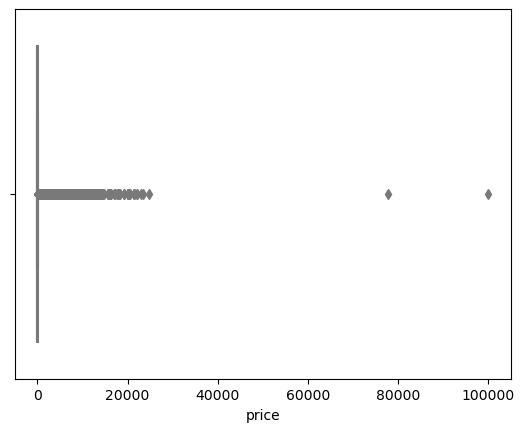

In [21]:
#boxplot of the totality of values for price
sns.boxplot(x = data_AM_UK['price'], color="lightblue");

In [22]:
#From the previous boxplot, we could see two products have extremely high values compared to the rest of the dataset.
data_AM_UK.sort_values(by='price', ascending=False).head(2)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category,price_category
2008013,2259336,B091F5Y3CT,HB FBA Test Treadmill,0.0,0,100000.0,False,0,Sports & Outdoors,high price
1987238,2235317,B0CDVKNBRV,Générique L.A 350° - I5 11400F - RTX 3050 8G -...,0.0,0,77752.0,False,0,Desktop PCs,high price


### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

In [16]:
data_AM_UK.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [17]:
#calcul stat ratings
mean_stars = data_AM_UK['stars'].mean()
median_stars = data_AM_UK['stars'].median()
mode_stars = data_AM_UK['stars'].mode()[0]


print('Mean stars is:',mean_stars)
print('Median stars is:',median_stars)
print('Modal stars is :',mode_stars)

Mean stars is: 2.152836472966065
Median stars is: 0.0
Modal stars is : 0.0


In [18]:
#calcul measures of dispersion.
var_stars = data_AM_UK['stars'].var()
std_stars = data_AM_UK['stars'].std()
range_stars = data_AM_UK['stars'].max()-data_AM_UK['stars'].min()
quantiles_stars = data_AM_UK['stars'].quantile([0.25,0.5, 0.75])

print('The variance of stars is:',var_stars)
print('The standard deviation of stars is:',std_stars)
print('The range of stars is:',range_stars)
print('The quantiles of stars are:')
print(quantiles_stars)

The variance of stars is: 4.81743402976196
The standard deviation of stars is: 2.1948653785054697
The range of stars is: 5.0
The quantiles of stars are:
0.25    0.0
0.50    0.0
0.75    4.4
Name: stars, dtype: float64


In [24]:
#Refining the plot making categorize of ratings from 0 to 5 with steps of 0.1 to have decimals
bins = np.arange(0, 5.1, 0.1)  # Including 5.1 to cover the range till 5
labels = [f'{i:.1f}-{i+0.1:.1f}' for i in np.arange(0, 5, 0.1)]
data_AM_UK['stars'] = pd.cut(data_AM_UK['stars'], bins=bins, labels=labels, right=False)

C:\Users\tania\AppData\Local\Temp\ipykernel_29848\2455312819.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data_AM_UK['stars'], discrete=True, shrink=.8, palette="bright")
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


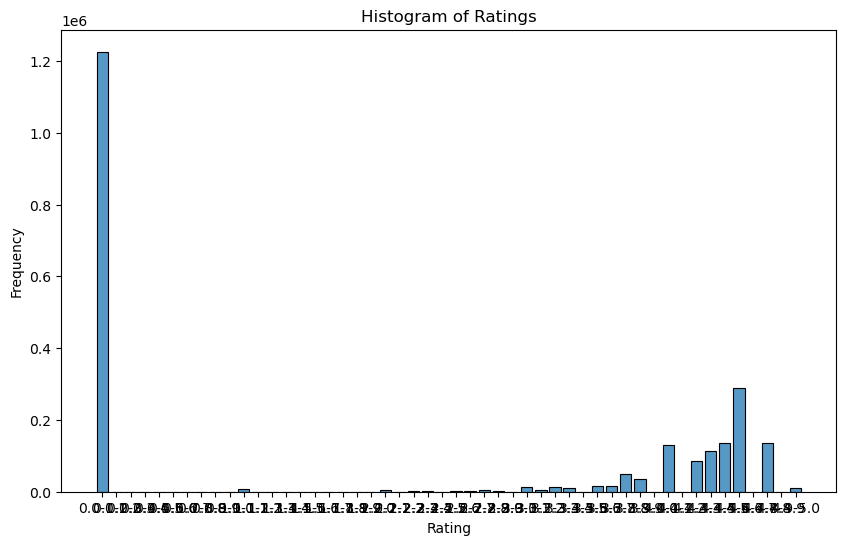

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(data_AM_UK['stars'], discrete=True, shrink=.8, palette="bright")
plt.title('Histogram of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()